# Manual assisted tracking

Code under GPLv3+ license <br>
Antoine Coulon, 2022 (Institut Curie – CNRS). antoine.coulon@curie.fr

In [1]:
import tracking as trk
import os

## First, adjust the following:

trk.fijiCmd='/Applications/Fiji.app/Contents/MacOS/ImageJ-macosx' # Mac
#trk.fijiCmd='C:/Users/Coulon_team/.Fiji.app/ImageJ-win64.exe'     # Windows
#trk.fijiCmd='/usr/bin/fiji'                                       # Linux

print('Using tracking.py v%s'%trk.__version__)

Using tracking.py v1.3.2


## Manually-assisted spot fitting and tracking

When you execute `trackUsingMouse()`:
1. The TIF file is shown in Fiji and you have to follow the spot of interest with the mouse (see`fps`  below for details). When done, close the window (depending on you system, you may also have to close Fiji). A `.mtrk` file is created (columns specified in header).  
If __`performFit`__ is set to`True`, then:
2. Spots are detected using a s.d. threshold on a bandpass filtered image. The
     region of interest (ROI) is centered on the position of the mouse. The detected
     spot that is the closest to both the mouse position and the spot found in
     the previous image is selected.
3. Iterative Gaussian mask fitting is used to localize and fit the spot in each
     frame. A `.trk2` file is created (columns specified in header).  
  

Parameters:
- __`fnTif`__:         Full path of the TIF file to be tracked.
- __`fnSuff`__:        Suffix added at the end of the TIF file name for the resulting `.mtrk` and `.trk2` files. (e.g. use `'_spot1'`, `'_spot2'`... if you track several spots i nthe same movie).
- __`fps`__: (Default: `0`)
  - If >0: Frame rate at which the movie is played during the manual tracking.
  - If 0, the movie has to be played manually (with right/left arrows or mouse wheel). You can go back and forth, only the last time a frame is shown is retained. (Caution: The mouse coordinates for a given frame are recorded when switching from that frame to another one. Hence, when you reach the end of the movie, you will need to go one frame back so that last frame is recorded too).  
  - If <0, fiji macro will not be run so that the existing `.mtrk` file is re-used.
- __`channel`__:       This indicates which channel of a multi-channel image is selected when Fiji opens. It can be ommitted. In all cases, the channel used for spot detection and fitting is the one on which the Fiji window is when performing the manual tracking. (0-based. Default: None)
- __`performFit`__:    If `False`, only the `.mtrk` file is generated. If `True`, Gaussian mask fitting is performed using the following parameters (note: only works on single-channel images for now).
- __`psfPx`__:         PSF size in pixels. Used for the bandpass filtering and the Gaussian fit. (Default: `1.7`)
- __`psfZPx`__:        PSD size in pixels in Z. Used for the bandpass filtering and the Gaussian fit. If `None`, the value of `psfPx` is used.
- __`thresholdSD`__:   Number of standard deviations used to detect objects in the bandpassed image. (Default: `5.`)
- __`roiSize`__:       Size in pixels of the ROI. (Default: `40`)
- __`border`__:        Number of pixels added one each side of the ROI in the bandpass filtering and removed afterwards. (Default: 3)
- __`distThreshold`__: Maximal distance that the spot can be from the position of the mouse. Used for both object detection in the bandpassed-filtered image and for testing the convergence of the Gaussian fit algorithm. (Default: 20.)
- __`trackMemory`__:   Maximal number of frames used for the location of the previous spot. If 0, only the distance to the mouse coordinates is used. (Default: 0)
- __`reactionDelay`__: Time delay (in sec) by which the manual coordinates are expected to be lagging. Only relevant iff `fps`>0. (Default: 0.)
- __`disp`__:          If `1`, the result of the tracking is displayed as graphs. If `2`, a `..._track.tif` file is created for visual inspection. Can be combined; e.g. `disp=1+2`. (Default: `3`)

Note: Depending on how your tif file is saves, you may have to (un)comment line 312 in `tracking.py`

In [2]:
dirTIFFs=os.path.abspath('../../1-TIFF_files/100s-PR/')
trk.checkImgDim(os.path.join(dirTIFFs,'20200304_100s-PR.tif'))


The dimensions of your image are: (600, 5, 212, 237)


Detecting spots... frame 0 - 1 object(s). best=[108.5,124.5]
Detecting spots... frame 1 - 1 object(s). best=[110.0,125.0]
Detecting spots... frame 2 - 1 object(s). best=[109.5,124.5]
Detecting spots... frame 3 - 1 object(s). best=[109.5,124.5]
Detecting spots... frame 4 - 1 object(s). best=[109.5,124.5]
Detecting spots... frame 5 - 1 object(s). best=[109.5,124.5]
Detecting spots... frame 6 - 1 object(s). best=[108.5,124.5]
Detecting spots... frame 7 - 1 object(s). best=[109.5,124.0]
Detecting spots... frame 8 - 1 object(s). best=[110.0,123.5]
Detecting spots... frame 9 - 1 object(s). best=[109.5,124.0]
Detecting spots... frame 10 - 1 object(s). best=[109.5,124.5]
Detecting spots... frame 11 - 1 object(s). best=[110.0,125.0]
Detecting spots... frame 12 - 1 object(s). best=[109.5,126.0]
Detecting spots... frame 13 - 1 object(s). best=[110.0,125.5]
Detecting spots... frame 14 - 1 object(s). best=[109.5,125.5]
Detecting spots... frame 15 - 1 object(s). best=[109.5,125.5]
Detecting spots...

Detecting spots... frame 186 - 1 object(s). best=[119.0,84.5]
Detecting spots... frame 187 - 1 object(s). best=[119.5,83.5]
Detecting spots... frame 188 - 1 object(s). best=[120.0,83.0]
Detecting spots... frame 189 - 1 object(s). best=[121.0,83.0]
Detecting spots... frame 190 - 1 object(s). best=[120.0,84.0]
Detecting spots... frame 191 - 1 object(s). best=[119.5,83.5]
Detecting spots... frame 192 - 1 object(s). best=[120.0,83.5]
Detecting spots... frame 193 - 1 object(s). best=[119.5,83.0]
Detecting spots... frame 194 - 1 object(s). best=[119.5,82.5]
Detecting spots... frame 195 - 1 object(s). best=[119.0,82.0]
Detecting spots... frame 196 - 1 object(s). best=[119.5,81.5]
Detecting spots... frame 197 - 1 object(s). best=[119.5,81.5]
Detecting spots... frame 198 - 1 object(s). best=[120.0,82.0]
Detecting spots... frame 199 - 1 object(s). best=[120.0,81.5]
Detecting spots... frame 200 - 1 object(s). best=[119.0,84.5]
Detecting spots... frame 201 - 1 object(s). best=[118.5,86.0]
Detectin

Detecting spots... frame 355 - 1 object(s). best=[114.5,67.5]
Detecting spots... frame 356 - 1 object(s). best=[114.0,67.5]
Detecting spots... frame 357 - 1 object(s). best=[114.5,67.0]
Detecting spots... frame 358 - 1 object(s). best=[114.5,67.5]
Detecting spots... frame 359 - 1 object(s). best=[115.0,67.5]
Detecting spots... frame 360 - 1 object(s). best=[113.5,69.5]
Detecting spots... frame 361 - 1 object(s). best=[115.5,70.5]
Detecting spots... frame 362 - 1 object(s). best=[115.0,72.5]
Detecting spots... frame 363 - 1 object(s). best=[116.5,74.5]
Detecting spots... frame 364 - 1 object(s). best=[116.0,75.5]
Detecting spots... frame 365 - 1 object(s). best=[115.0,75.0]
Detecting spots... frame 366 - 1 object(s). best=[114.5,75.0]
Detecting spots... frame 367 - 1 object(s). best=[115.0,74.5]
Detecting spots... frame 368 - 1 object(s). best=[115.0,74.5]
Detecting spots... frame 369 - 1 object(s). best=[114.5,75.5]
Detecting spots... frame 370 - 1 object(s). best=[115.0,74.5]
Detectin

Detecting spots... frame 564 - 1 object(s). best=[114.0,84.0]
Detecting spots... frame 565 - 1 object(s). best=[113.5,84.5]
Detecting spots... frame 566 - 1 object(s). best=[114.0,84.0]
Detecting spots... frame 567 - 1 object(s). best=[113.5,83.5]
Detecting spots... frame 568 - 1 object(s). best=[113.5,83.5]
Detecting spots... frame 569 - 1 object(s). best=[114.5,83.5]
Detecting spots... frame 570 - 1 object(s). best=[113.0,83.5]
Detecting spots... frame 571 - 1 object(s). best=[113.5,83.5]
Detecting spots... frame 572 - 1 object(s). best=[113.5,83.5]
Detecting spots... frame 573 - 1 object(s). best=[113.5,83.5]
Detecting spots... frame 574 - 1 object(s). best=[113.5,84.0]
Detecting spots... frame 575 - 1 object(s). best=[113.5,84.0]
Detecting spots... frame 576 - 1 object(s). best=[114.0,84.5]
Detecting spots... frame 577 - 1 object(s). best=[114.5,84.5]
Detecting spots... frame 578 - 1 object(s). best=[113.5,84.0]
Detecting spots... frame 579 - 1 object(s). best=[113.5,84.0]
Detectin

Fitting spots... frame 163 (converged: y) - [119.7,88.5]
Fitting spots... frame 164 (converged: y) - [119.5,90.0]
Fitting spots... frame 165 (converged: y) - [118.1,90.7]
Fitting spots... frame 166 (converged: y) - [119.3,91.4]
Fitting spots... frame 167 (converged: y) - [119.4,92.1]
Fitting spots... frame 168 (converged: y) - [119.5,92.8]
Fitting spots... frame 169 (converged: y) - [120.6,92.3]
Fitting spots... frame 170 (converged: y) - [120.0,92.9]
Fitting spots... frame 171 (converged: y) - [120.1,93.5]
Fitting spots... frame 172 (converged: y) - [120.3,94.0]
Fitting spots... frame 173 (converged: y) - [119.6,95.1]
Fitting spots... frame 174 (converged: y) - [119.9,95.1]
Fitting spots... frame 175 (converged: y) - [119.8,95.5]
Fitting spots... frame 176 (converged: y) - [120.1,95.6]
Fitting spots... frame 177 (converged: y) - [120.5,95.9]
Fitting spots... frame 178 (converged: y) - [120.5,97.2]
Fitting spots... frame 179 (converged: y) - [120.1,96.1]
Fitting spots... frame 180 (con

Fitting spots... frame 318 (converged: y) - [115.8,68.9]
Fitting spots... frame 319 (converged: y) - [115.2,68.9]
Fitting spots... frame 320 (converged: y) - [116.3,69.9]
Fitting spots... frame 321 (converged: y) - [113.9,73.3]
Fitting spots... frame 322 (converged: y) - [116.3,72.4]
Fitting spots... frame 323 (converged: y) - [117.2,74.2]
Fitting spots... frame 324 (converged: y) - [117.1,74.1]
Fitting spots... frame 325 (converged: y) - [116.5,75.0]
Fitting spots... frame 326 (converged: y) - [116.8,75.5]
Fitting spots... frame 327 (converged: y) - [116.6,76.0]
Fitting spots... frame 328 (converged: y) - [115.9,76.4]
Fitting spots... frame 329 (converged: y) - [115.7,76.9]
Fitting spots... frame 330 (converged: y) - [115.5,77.5]
Fitting spots... frame 331 (converged: y) - [115.0,78.0]
Fitting spots... frame 332 (converged: y) - [114.2,78.4]
Fitting spots... frame 333 (converged: y) - [114.2,80.1]
Fitting spots... frame 334 (converged: y) - [113.4,80.6]
Fitting spots... frame 335 (con

Fitting spots... frame 496 (converged: y) - [114.0,80.9]
Fitting spots... frame 497 (converged: y) - [114.9,81.3]
Fitting spots... frame 498 (converged: y) - [114.4,81.4]
Fitting spots... frame 499 (converged: y) - [114.1,81.5]
Fitting spots... frame 500 (converged: y) - [113.4,81.4]
Fitting spots... frame 501 (converged: y) - [113.0,81.7]
Fitting spots... frame 502 (converged: y) - [113.9,81.7]
Fitting spots... frame 503 (converged: y) - [113.9,82.1]
Fitting spots... frame 504 (converged: y) - [113.8,82.6]
Fitting spots... frame 505 (converged: y) - [112.6,83.4]
Fitting spots... frame 506 (converged: y) - [113.3,83.1]
Fitting spots... frame 507 (converged: y) - [113.4,82.5]
Fitting spots... frame 508 (converged: y) - [113.4,82.5]
Fitting spots... frame 509 (converged: y) - [113.5,82.7]
Fitting spots... frame 510 (converged: y) - [113.3,82.5]
Fitting spots... frame 511 (converged: y) - [113.3,82.7]
Fitting spots... frame 512 (converged: y) - [113.1,82.2]
Fitting spots... frame 513 (con

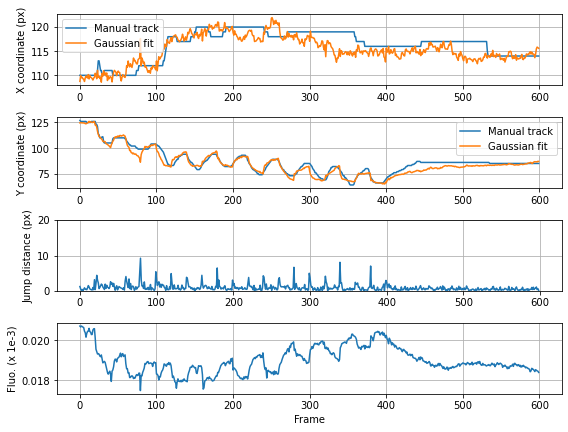

In [3]:
dirTIFFs=os.path.abspath('../../1-TIFF_files/100s-PR/')
trk.trackUsingMouse(os.path.join(dirTIFFs,'20200304_100s-PR.tif'),'',fps=0, channel=2, inputImgDim='TCYX')


Detecting spots... frame 0 - 1 object(s). best=[92.0,81.5,14.5]
Detecting spots... frame 1 - 1 object(s). best=[80.5,82.0,13.0]
Detecting spots... frame 2 - 1 object(s). best=[84.0,81.0,14.0]
Detecting spots... frame 3 - 1 object(s). best=[86.0,75.0,12.0]
Detecting spots... frame 4 - 1 object(s). best=[85.0,72.0,11.5]
Detecting spots... frame 5 - 1 object(s). best=[84.5,69.5,11.0]
Detecting spots... frame 6 - 1 object(s). best=[82.0,64.5,10.5]
Detecting spots... frame 7 - 1 object(s). best=[80.5,63.5,11.5]
Detecting spots... frame 8 - 1 object(s). best=[84.0,53.5,11.0]
Detecting spots... frame 9 - 1 object(s). best=[84.0,43.5,11.0]
Detecting spots... frame 10 - 1 object(s). best=[84.0,41.0,12.0]
Detecting spots... frame 11 - 1 object(s). best=[83.5,40.5,12.0]
Detecting spots... frame 12 - 1 object(s). best=[84.5,40.0,11.0]
Detecting spots... frame 13 - 1 object(s). best=[86.0,37.0,11.0]
Detecting spots... frame 14 - 1 object(s). best=[87.0,36.0,11.0]
Detecting spots... frame 15 - 1 obj

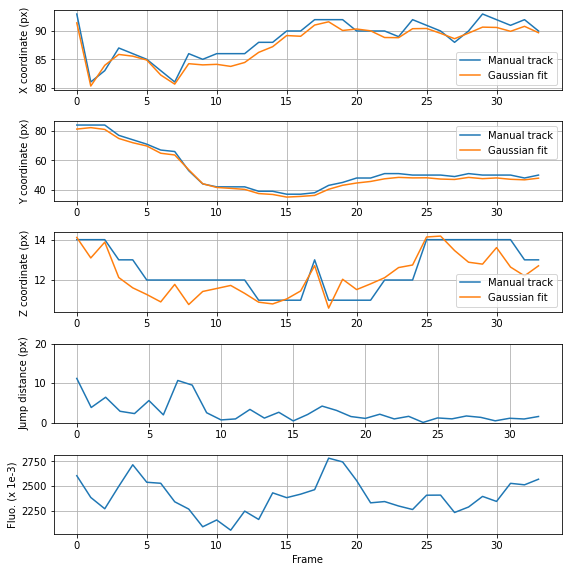

In [4]:
dirTIFFs=os.path.abspath('../../1-TIFF_files/30min-PR/')
trk.trackUsingMouse(os.path.join(dirTIFFs,'20200221_Pos4_cell0_c2.tif'),'',fps=0, channel=1, inputImgDim='TZYX')


-----